In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.getcwd()

'C:\\Users\\bojce\\Desktop'

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
saved_style_state = matplotlib.rcParams.copy()

In [4]:
import os
import pandas as pd
if os.path.isfile("dataset.csv"):
    filepath = "dataset.csv"
    print "loading from file"
else:        
    filepath = "http://data.nsw.gov.au/data/dataset/388ab702-2925-43eb-a07b-a821ec8885f7/resource/7c86ad2c-f78c-4792-b52e-95db3a187c02/download/ES16-048-FA74.XLSX"
    print "loading from the internet"
SpeedCameras_data = pd.read_csv(filepath)
print "done"

loading from file
done


In [5]:
# keep columns which will be used later on
sc = SpeedCameras_data[["Postcode", "Speed cameras2014Number", "Speed cameras2014Value ($)", "Speed cameras2015Number", "Speed cameras2015Value ($)"]]

In [6]:
sc.head()

,Postcode,Speed cameras2014Number,Speed cameras2014Value ($),Speed cameras2015Number,Speed cameras2015Value ($)
0,2170.0,11399.0,3317377.0,11436.0,3414302.0
1,2145.0,7383.0,2067981.0,8544.0,2496596.0
2,2560.0,6542.0,1799348.0,5669.0,1587243.0
3,2148.0,6142.0,1725718.0,6707.0,1929015.0
4,2200.0,5844.0,1745769.0,6477.0,1927438.0


In [12]:
def value14(row):
    return row["Speed cameras2014Value ($)"] / row["Speed cameras2014Number"]


def value15(row):
    return row["Speed cameras2015Value ($)"] / row["Speed cameras2015Number"]

sc["flash_val_14"] = sc.apply(value14, axis=1)

sc["flash_val_15"] = sc.apply(value15, axis=1)

sc.head()

C:\Users\bojce\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\bojce\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


,Postcode,Speed cameras2014Number,Speed cameras2014Value ($),Speed cameras2015Number,Speed cameras2015Value ($),flash_val_14,flash_val_15
0,2170.0,11399.0,3317377.0,11436.0,3414302.0,291.023511,298.557363
1,2145.0,7383.0,2067981.0,8544.0,2496596.0,280.100366,292.204588
2,2560.0,6542.0,1799348.0,5669.0,1587243.0,275.045552,279.986417
3,2148.0,6142.0,1725718.0,6707.0,1929015.0,280.970042,287.612196
4,2200.0,5844.0,1745769.0,6477.0,1927438.0,298.728439,297.581905


In [43]:
def total_number(row):
    return row["Speed cameras2014Number"] + row["Speed cameras2015Number"]

sc["total_number"] = sc.apply(total_number, axis=1)

sc.head()

,Postcode,Speed cameras2014Number,Speed cameras2014Value ($),Speed cameras2015Number,Speed cameras2015Value ($),flash_val_14,flash_val_15,total_number
0,2170.0,11399.0,3317377.0,11436.0,3414302.0,291.023511,298.557363,22835.0
1,2145.0,7383.0,2067981.0,8544.0,2496596.0,280.100366,292.204588,15927.0
2,2560.0,6542.0,1799348.0,5669.0,1587243.0,275.045552,279.986417,12211.0
3,2148.0,6142.0,1725718.0,6707.0,1929015.0,280.970042,287.612196,12849.0
4,2200.0,5844.0,1745769.0,6477.0,1927438.0,298.728439,297.581905,12321.0


In [100]:
def total_value(row):
    return row["Speed cameras2014Value ($)"] + row["Speed cameras2015Value ($)"]

sc["total_value"] = sc.apply(total_value, axis=1)

sc.head()

,Postcode,Speed cameras2014Number,Speed cameras2014Value ($),Speed cameras2015Number,Speed cameras2015Value ($),flash_val_14,flash_val_15,total_number,total_value
0,2170.0,11399.0,3317377.0,11436.0,3414302.0,291.023511,298.557363,22835.0,6731679.0
1,2145.0,7383.0,2067981.0,8544.0,2496596.0,280.100366,292.204588,15927.0,4564577.0
2,2560.0,6542.0,1799348.0,5669.0,1587243.0,275.045552,279.986417,12211.0,3386591.0
3,2148.0,6142.0,1725718.0,6707.0,1929015.0,280.970042,287.612196,12849.0,3654733.0
4,2200.0,5844.0,1745769.0,6477.0,1927438.0,298.728439,297.581905,12321.0,3673207.0


In [76]:
sc.flash_val_14.hist(label="2014")
sc.flash_val_15.hist(label="2015")

plt.ylim([0,500])
plt.title("Comparison of Speed Camera cost per flash in 2014 and 2015", size=24);
plt.xlabel("Value", size=14);
plt.legend();

NameError: name 'sc' is not defined

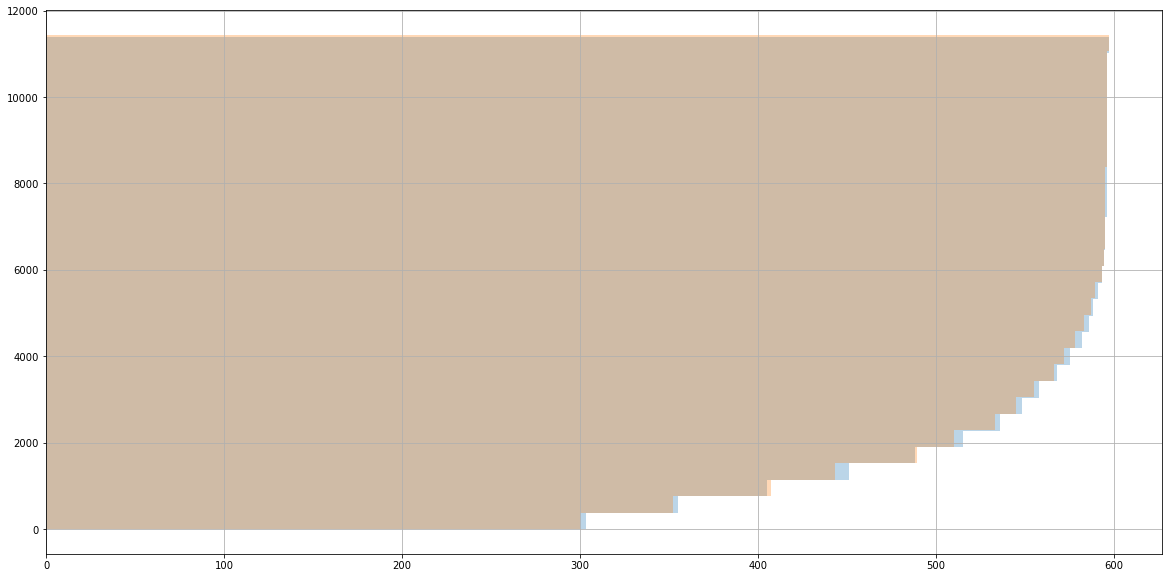

In [99]:
# beige values overlap, blue and orange do not
sc["Speed cameras2014Number"].hist(orientation='horizontal', cumulative=True, alpha = 0.3, bins = 30)
sc["Speed cameras2015Number"].hist(orientation='horizontal', cumulative=True, alpha = 0.3, bins = 30)
plt.show()

<function matplotlib.pyplot.show>

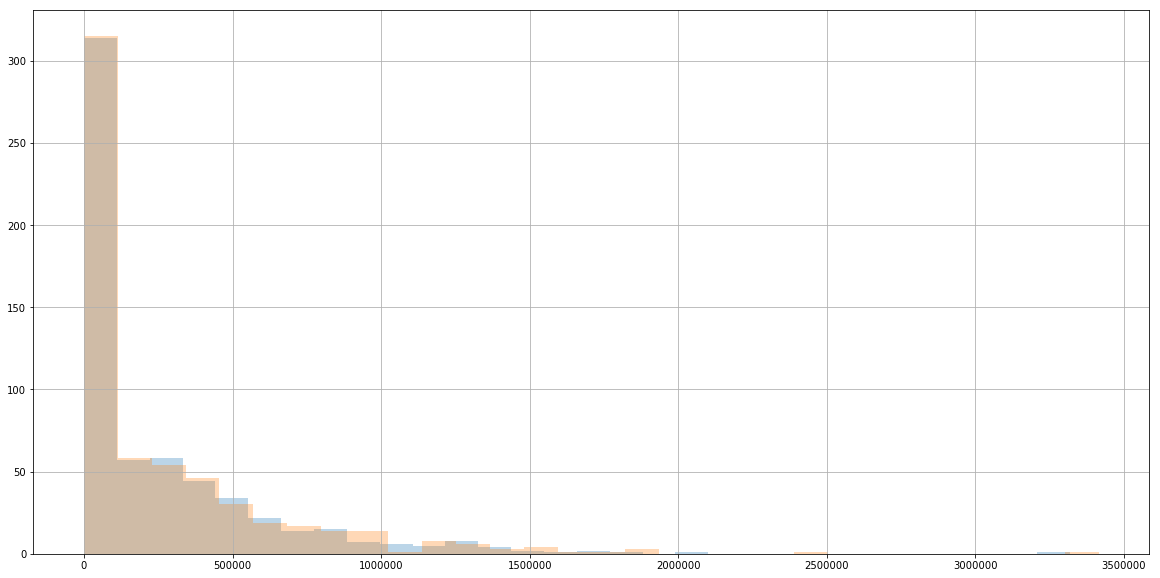

In [73]:
sc["Speed cameras2014Value ($)"].hist(alpha = 0.3, bins = 30)
sc["Speed cameras2015Value ($)"].hist(alpha = 0.3, bins = 30)
plt.show

In [233]:
postcodes = ['2020.0', '2205.0', '2207.0', '2208.0', '2209.0', '2210.0', '2216.0', '2217.0', '2218.0', '2219.0', '2220.0', '2221.0', '2222.0', '2223.0', '3191.0']
truthList = []
for postcode in sc["Postcode"]:
    if str(postcode) in postcodes:
        truthList.append(True)
    else:
        truthList.append(False)
        
sc["cullColumn"] = truthList

st_george = sc[sc["cullColumn"] == True]
print st_george

     Postcode  Speed cameras2014Number  Speed cameras2014Value ($)  \
28     2216.0                   3861.0                   1004910.0   
44     2220.0                   3255.0                    852369.0   
50     2210.0                   2880.0                    738709.0   
52     2207.0                   3128.0                    821323.0   
55     2217.0                   2995.0                    787506.0   
100    2205.0                   1999.0                    551494.0   
112    2221.0                   1971.0                    497802.0   
114    2020.0                   2022.0                    550539.0   
124    2223.0                   1758.0                    432763.0   
135    2209.0                   1772.0                    484203.0   
143    2219.0                   1715.0                    431259.0   
146    2218.0                   1635.0                    411851.0   
147    2208.0                   1717.0                    480583.0   
199    2222.0       

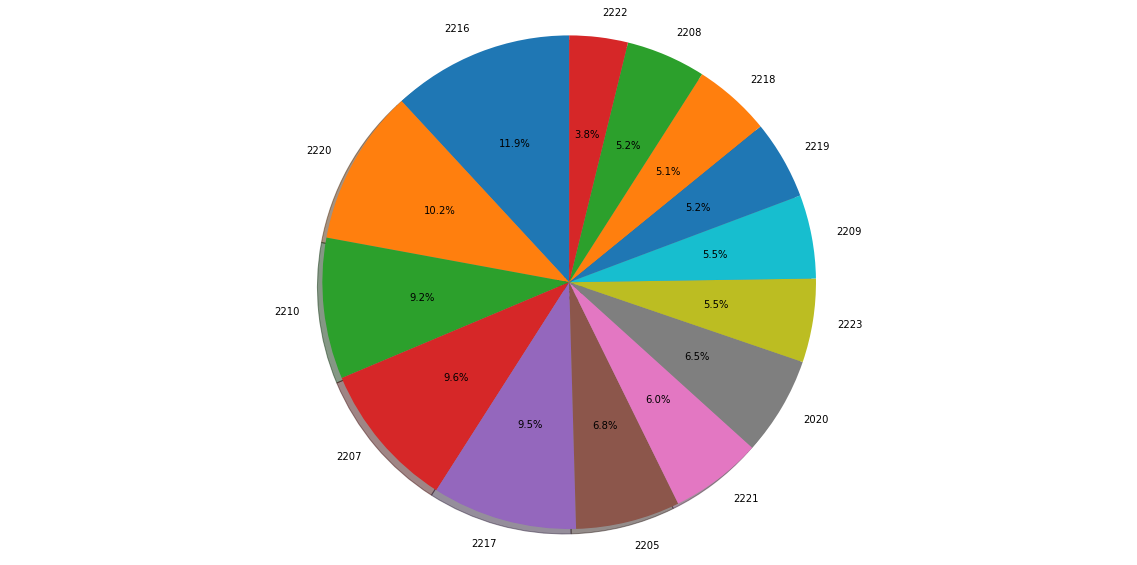

In [234]:
labels = '2216', '2220', '2210', '2207', '2217', '2205', '2221', '2020', '2223', '2209', '2219', '2218', '2208', '2222'
sizes = [7635, 6570, 5937, 6174, 6099, 4392, 3868, 4148, 3522, 3519, 3316, 3262, 3351, 2462]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Percentage of speed camera flashes in 2014 and 2015  St. George area", size=24);
plt.show()

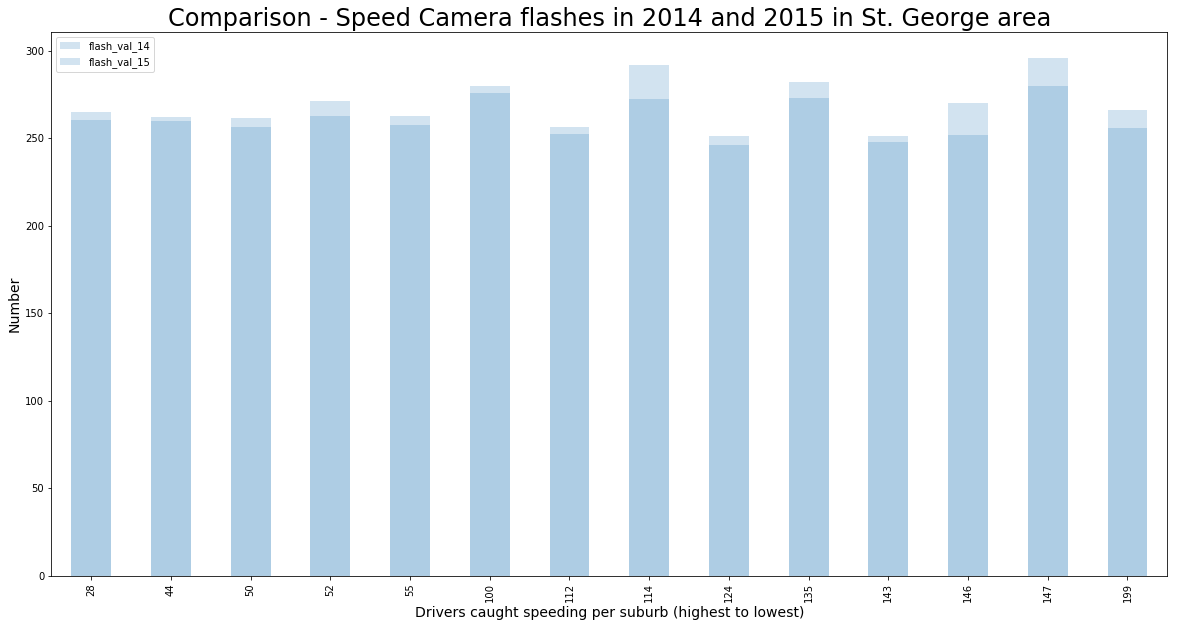

In [257]:
st_george["flash_val_14"].plot.bar(alpha = 0.2)
st_george["flash_val_15"].plot.bar(alpha = 0.2)
plt.show
plt.title("Comparison - Speed Camera flashes in 2014 and 2015 in St. George area", size=24);
plt.ylabel("Number", size=14);
plt.xlabel("Drivers caught speeding per suburb (highest to lowest)", size=14);
plt.legend();

In [237]:
postcodes = ['2232.0', '2233.0', '2229.0', '2228.0', '2230.0', '2234.0', '2224.0', '2226.0']
truthList = []
for postcode in sc["Postcode"]:
    if str(postcode) in postcodes:
        truthList.append(True)
    else:
        truthList.append(False)
        
sc["cullColumn"] = truthList

sutherland_shire = sc[sc["cullColumn"] == True]
print sutherland_shire

     Postcode  Speed cameras2014Number  Speed cameras2014Value ($)  \
36     2234.0                   3176.0                    800793.0   
51     2230.0                   2825.0                    679197.0   
56     2229.0                   2841.0                    738511.0   
66     2232.0                   2554.0                    644341.0   
104    2233.0                   1842.0                    457299.0   
137    2228.0                   1652.0                    424096.0   
148    2224.0                   1528.0                    374556.0   
241    2226.0                    921.0                    235354.0   

     Speed cameras2015Number  Speed cameras2015Value ($)  flash_val_14  \
36                    3207.0                    838731.0    252.138854   
51                    2896.0                    727173.0    240.423717   
56                    2765.0                    738512.0    259.947554   
66                    2502.0                    643236.0    252.287001   

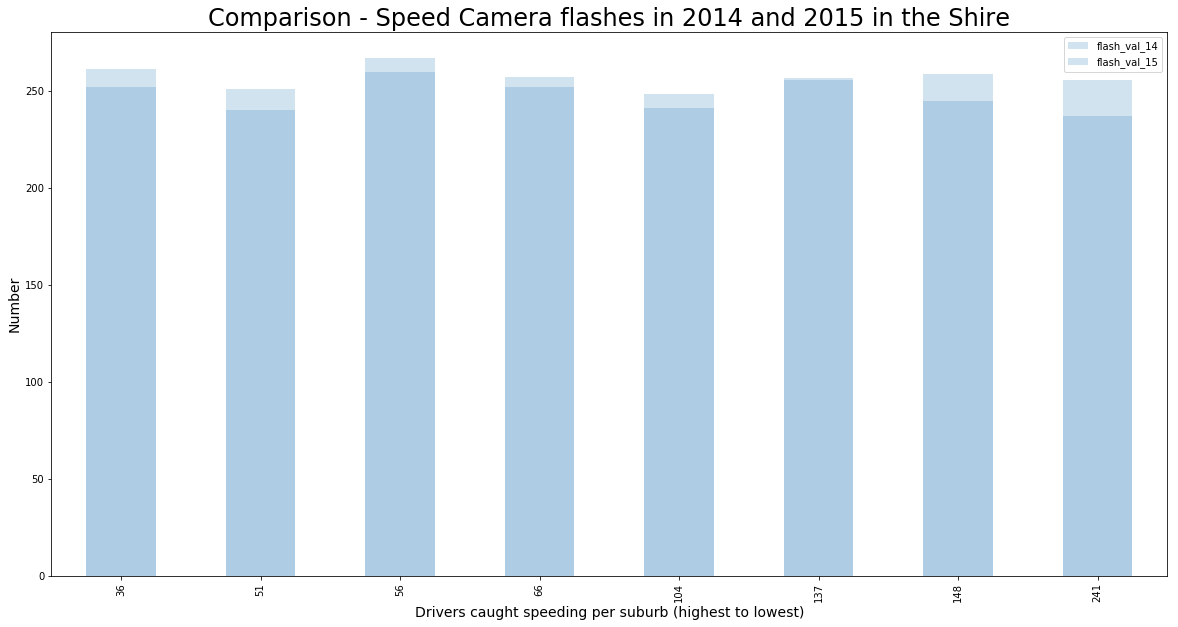

In [256]:
sutherland_shire["flash_val_14"].plot.bar(alpha = 0.2)
sutherland_shire["flash_val_15"].plot.bar(alpha = 0.2)
plt.show
plt.title("Comparison - Speed Camera flashes in 2014 and 2015 in the Shire", size=24);
plt.ylabel("Number", size=14);
plt.xlabel("Drivers caught speeding per suburb (highest to lowest)", size=14);
plt.legend();

In [253]:
postcodes = ['2016.0', '2036.0', '2019.0', '2032.0', '2027.0']
truthList = []
for postcode in sc["Postcode"]:
    if str(postcode) in postcodes:
        truthList.append(True)
    else:
        truthList.append(False)
        
sc["cullColumn"] = truthList

eastern_suburbs = sc[sc["cullColumn"] == True]
print eastern_suburbs

     Postcode  Speed cameras2014Number  Speed cameras2014Value ($)  \
30     2036.0                   3840.0                    918096.0   
133    2032.0                   1946.0                    474104.0   
186    2016.0                   1523.0                    366311.0   
194    2019.0                   1324.0                    320245.0   
198    2027.0                   1357.0                    342849.0   

     Speed cameras2015Number  Speed cameras2015Value ($)  flash_val_14  \
30                    3890.0                    980970.0    239.087500   
133                   1997.0                    535500.0    243.630010   
186                   1353.0                    324757.0    240.519370   
194                   1420.0                    402120.0    241.876888   
198                   1433.0                    341338.0    252.652174   

     flash_val_15  total_number  total_value cullColumn  
30     252.177378        7730.0    1899066.0       True  
133    268.152228 

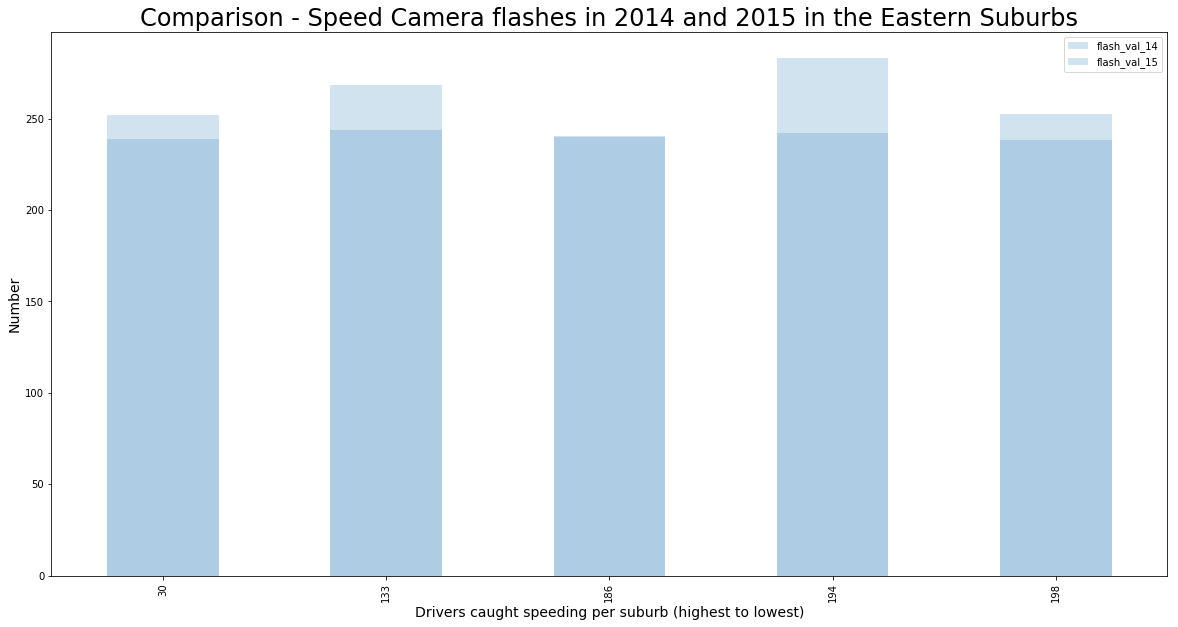

In [255]:
eastern_suburbs["flash_val_14"].plot.bar(alpha = 0.2)
eastern_suburbs["flash_val_15"].plot.bar(alpha = 0.2)
plt.show
plt.title("Comparison - Speed Camera flashes in 2014 and 2015 in the Eastern Suburbs", size=24);
plt.ylabel("Number", size=14);
plt.xlabel("Drivers caught speeding per suburb (highest to lowest)", size=14);
plt.legend();

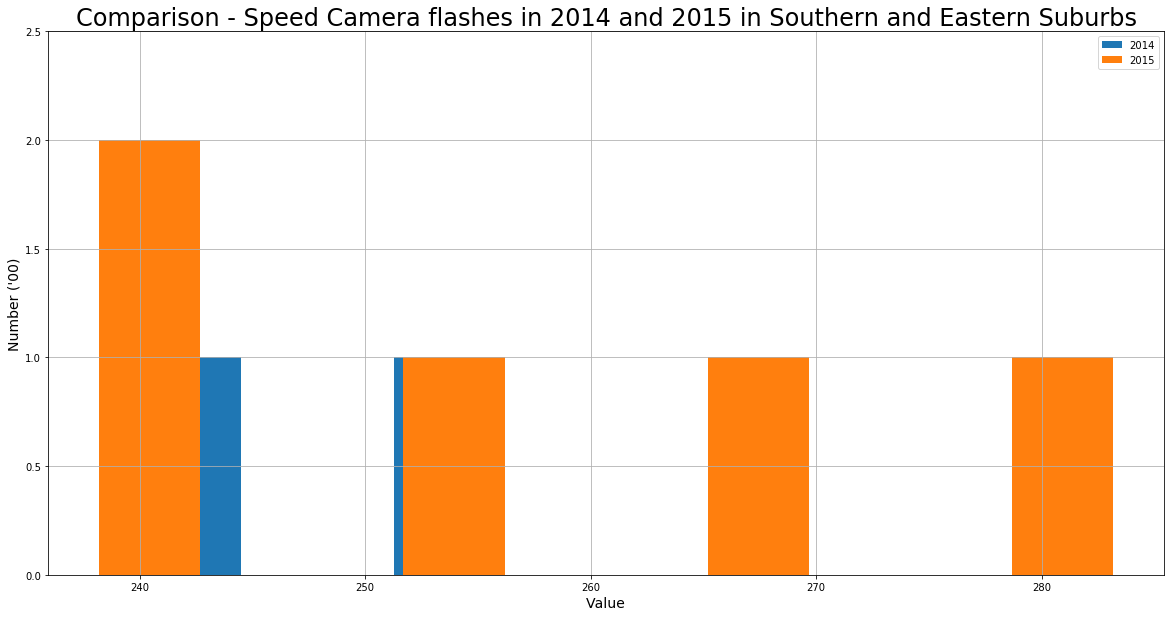

In [269]:
st_george, sutherland_shire, eastern_suburbs.flash_val_14.hist(label="2014")
st_george, sutherland_shire, eastern_suburbs.flash_val_15.hist(label="2015")

plt.ylim([0,2.5])
plt.title("Comparison - Speed Camera flashes in 2014 and 2015 in Southern and Eastern Suburbs", size=24);
plt.ylabel("Number ('00)", size=14);
plt.xlabel("Value", size=14);
plt.legend();